In [16]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# Model 1 - Horizontal stratigraphic

This script demonstrates how to create a basic model of horizontally stacked layers using GemPy,
a Python-based, open-source library for implicit geological modeling.


In [17]:
# Import necessary libraries
import gempy as gp
import gempy_viewer as gpv


# sphinx_gallery_thumbnail_number = 2

Generate the model
Define the path to data



In [18]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
# Create a GeoModel instance
data = gp.create_geomodel(
    project_name='horizontal',
    extent=[0, 1000, 0, 1000, 0, 1000],
    refinement=6,
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=data_path + "/data/input_data/jan_models/model1_orientations.csv",
        path_to_surface_points=data_path + "/data/input_data/jan_models/model1_surface_points.csv"
    )
)
# Map geological series to surfaces
gp.map_stack_to_surfaces(
    gempy_model=data,
    mapping_object={"Strat_Series": ('rock2', 'rock1')}
)
# Compute the geological model
gp.compute_model(data)
geo_data = data

Surface points hash:  6f1a39ed77e87a4057f03629c946b1876b87e24409cadfe0e1cf7ab1488f69e4
Orientations hash:  04c307ae23f70252fe54144a2fb95ca7d96584a2d497ea539ed32dfd23e7cd5d
Setting Backend To: AvailableBackends.numpy


d:\anaconda\envs\gempy3\lib\site-packages\gempy\core\data\geo_model.py:164: UserWarning: You are using refinement and passing a regular grid. The resolution of the regular grid will be overwritten
  warnings.warn(


Plot the initial geological model in the y direction without results



d:\anaconda\envs\gempy3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


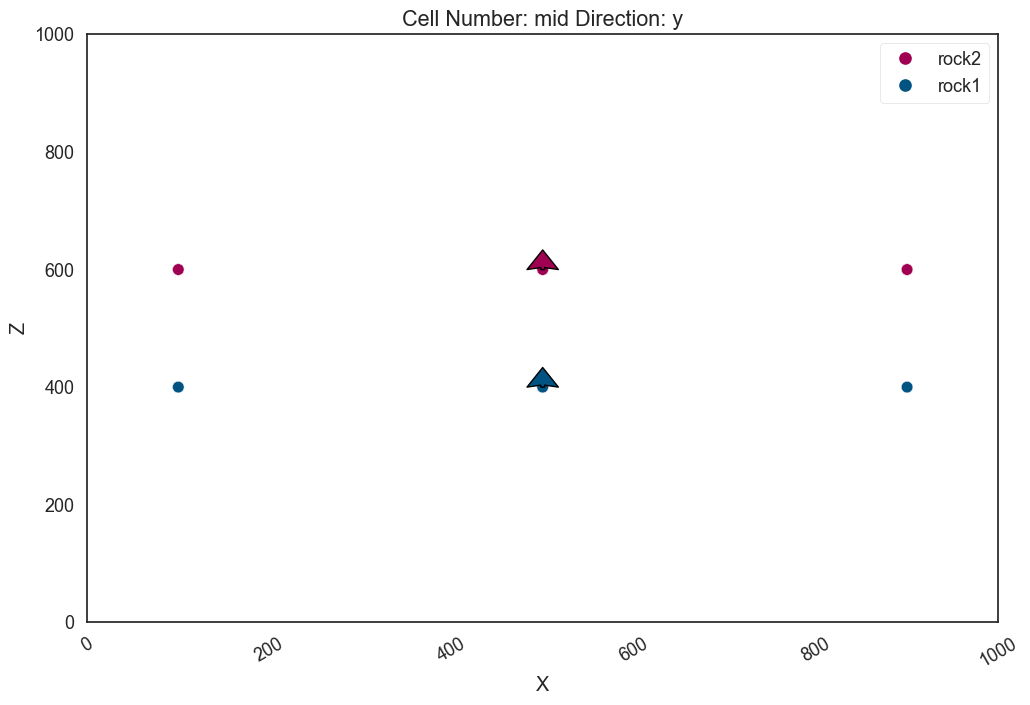

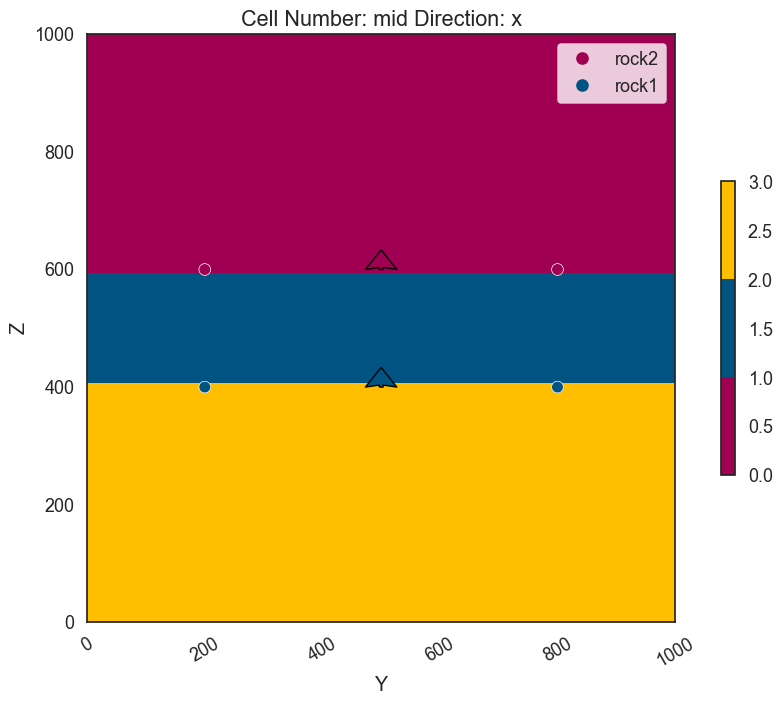

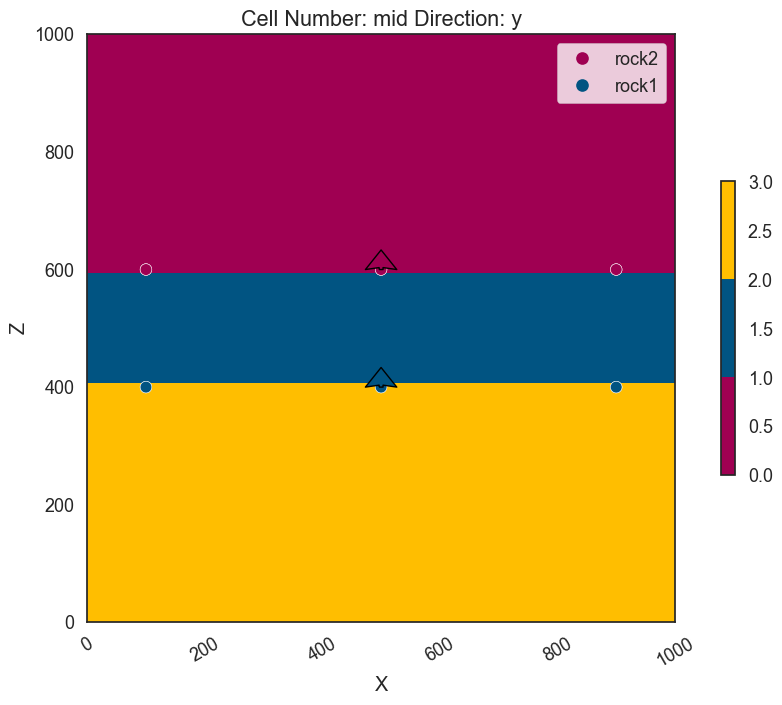

In [19]:
gpv.plot_2d(geo_data, direction=['y'], show_results=False)

# Plot the result of the model in the x and y direction with data and without boundaries
gpv.plot_2d(geo_data, direction=['x'], show_data=True, show_boundaries=False)
gpv.plot_2d(geo_data, direction=['y'], show_data=True, show_boundaries=False)

### export VTK model

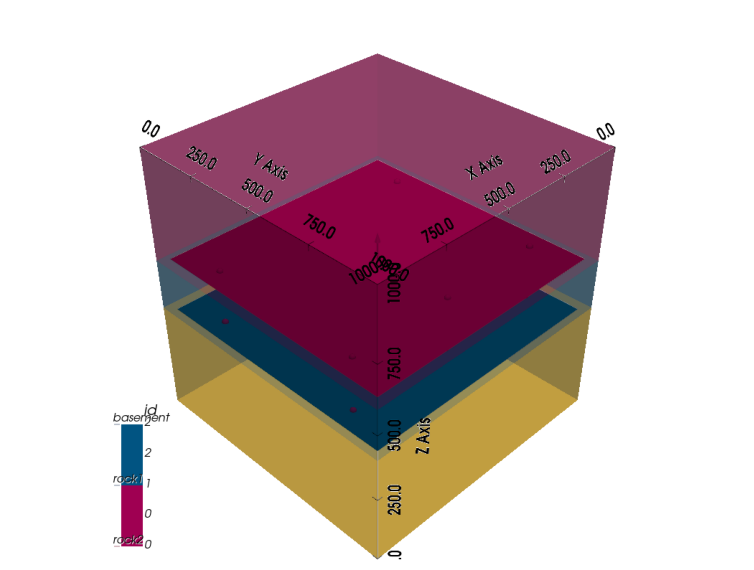

In [20]:
p = gpv.plot_3d(geo_data, show_data=True, show_results=True, show_boundaries=True,image=True)
p.surface_poly['rock1'].save('rock1.vtk') # Save the vtk file for formation 1
p.surface_poly['rock2'].save('rock2.vtk') # Save the vtk file for formation 2
p.orientations_mesh.save('orientations.vtk') # Save the vtk file for the orientations
p.surface_points_mesh.save('surface_points.vtk') # Save the vtk file for the surface points
box = p.regular_grid_actor.GetMapper().GetInput() # Get the vtk file for the regular grid
box.save('box.vtk')

d:\anaconda\envs\gempy3\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


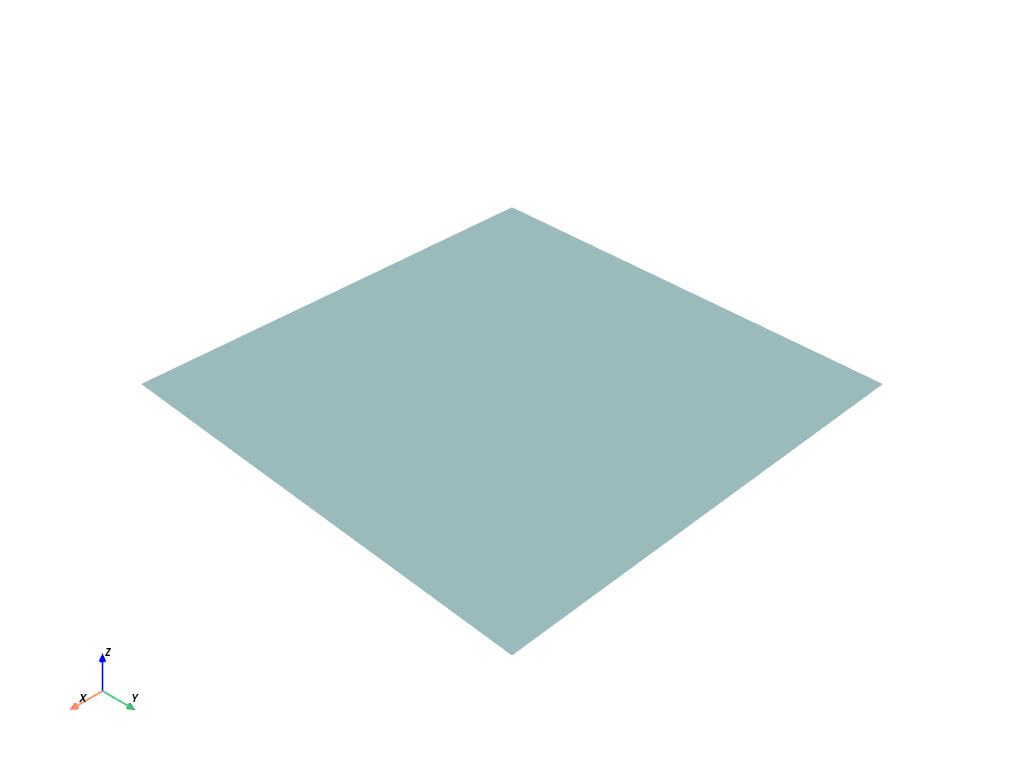

d:\anaconda\envs\gempy3\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


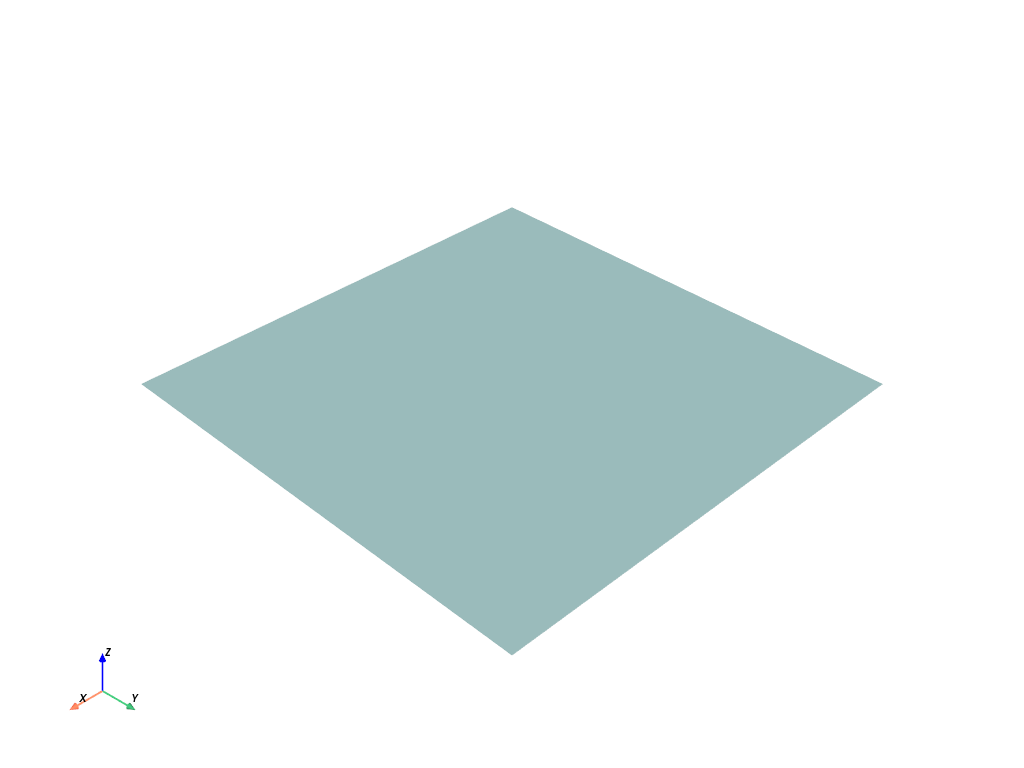

d:\anaconda\envs\gempy3\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


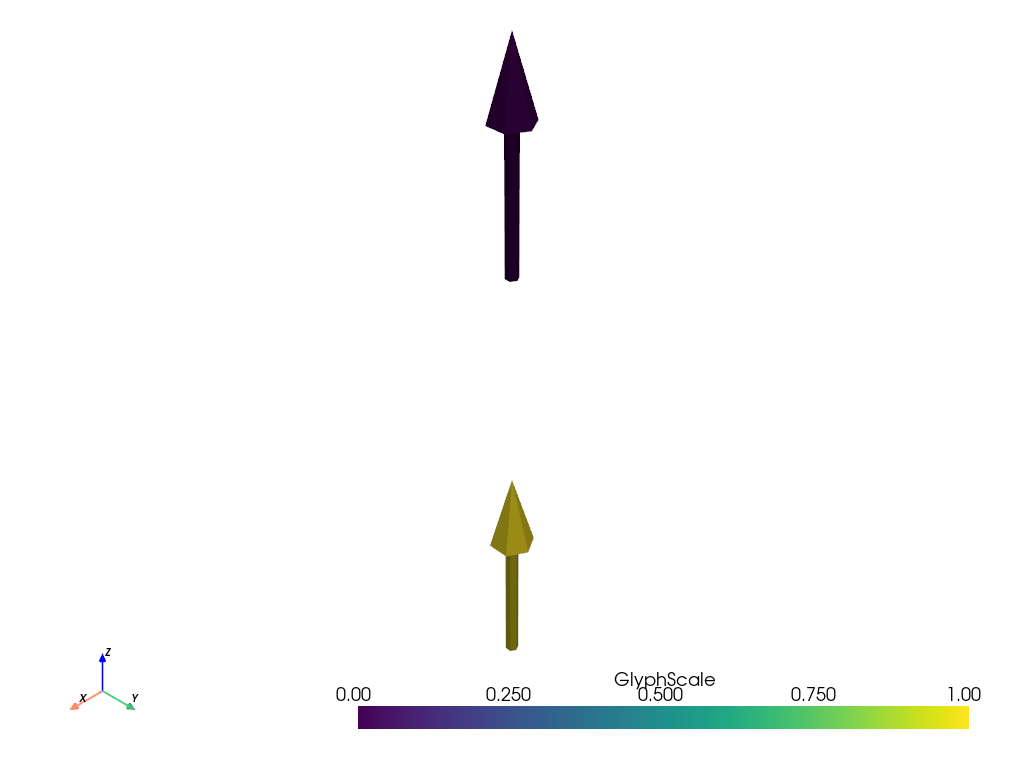

d:\anaconda\envs\gempy3\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


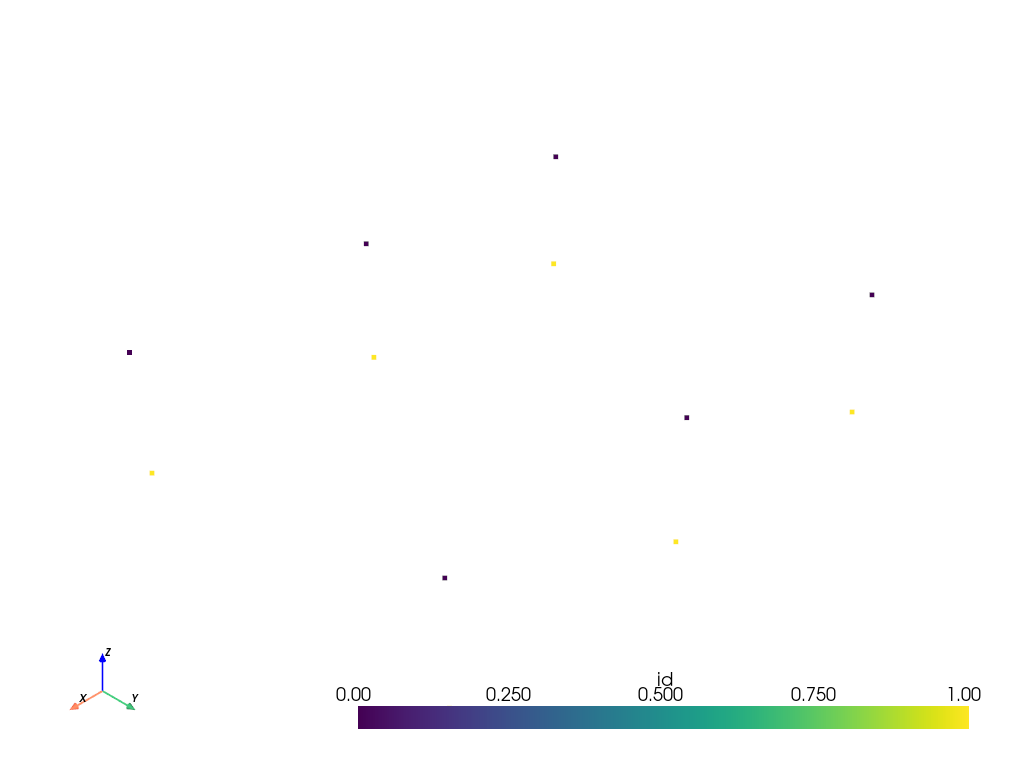

d:\anaconda\envs\gempy3\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


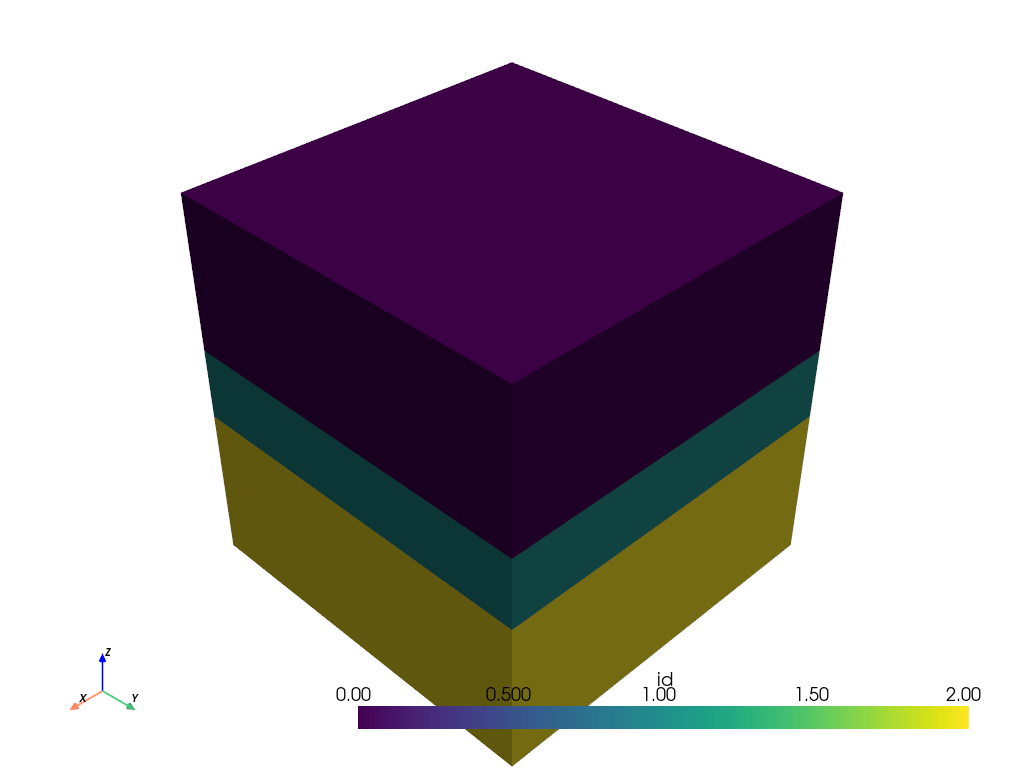

In [21]:
import pyvista as pv
pv.read('rock1.vtk').plot(show_edges=False)
pv.read('rock2.vtk').plot(show_edges=False)
pv.read('orientations.vtk').plot(show_edges=False)
pv.read('surface_points.vtk').plot(show_edges=False)
pv.read('box.vtk').plot(show_edges=False)

### export vertices of mesh

In [22]:
from builtins import range
import vtk
import pandas as pd
def generate_normals(polydata):
    normal_generator = vtk.vtkPolyDataNormals()
    normal_generator.SetInputData(polydata)
    normal_generator.ComputePointNormalsOn()
    normal_generator.ComputeCellNormalsOff()
    normal_generator.Update()
    return normal_generator.GetOutput()

def get_vertices_and_normals(mesh):

    surface_mesh = mesh.extract_surface()
    polydata = surface_mesh

    # Generate normals if not present
    polydata_with_normals = generate_normals(polydata)

    # Get points (vertices)
    points = polydata_with_normals.GetPoints()
    vertices = []
    for i in range(points.GetNumberOfPoints()):
        vertices.append(points.GetPoint(i))

    # Get normals
    normals_array = polydata_with_normals.GetPointData().GetNormals()
    normals = []
    for i in range(normals_array.GetNumberOfTuples()):
        normals.append(normals_array.GetTuple(i))

    return vertices, normals

def save_to_excel(vertices, normals, vertices_file, normals_file):
    # Create DataFrames
    vertices_df = pd.DataFrame(vertices, columns=['X', 'Y', 'Z'])
    normals_df = pd.DataFrame(normals, columns=['x', 'y', 'z'])

    # Save to Excel files
    vertices_df.to_excel(vertices_file, index=False)
    normals_df.to_excel
mesh = p.surface_poly['rock1']
vertices, normals = get_vertices_and_normals(mesh)
vertices_df = pd.DataFrame(vertices, columns=['X', 'Y', 'Z'])
normals_df = pd.DataFrame(normals, columns=['x', 'y', 'z'])
# Save to Excel filesthe
vertices_file = "rock1_vertices.xlsx"
normals_file = "rock1_norms.xlsx"
save_to_excel(vertices, normals, vertices_file, normals_file)

In [23]:
pd.read_excel(vertices_file)

,X,Y,Z
0,31.2516,31.2516,400.003754
1,31.2516,93.7516,400.002584
2,93.7516,31.2516,400.003132
3,93.7516,93.7516,400.001911
4,31.2516,156.2516,400.001528
...,...,...,...
251,968.7516,843.7516,400.001570
252,906.2516,906.2516,400.001950
253,906.2516,968.7516,400.003171
254,968.7516,906.2516,400.002626


In [24]:
pd.read_excel(normals_file)

,x,y,z
0,0.000010,0.000019,1
1,0.000011,0.000018,1
2,0.000009,0.000019,1
3,0.000009,0.000019,1
4,0.000012,0.000016,1
...,...,...,...
251,-0.000012,-0.000016,1
252,-0.000009,-0.000019,1
253,-0.000009,-0.000019,1
254,-0.000011,-0.000018,1


In [25]:
# Convert the DataFrame to an XYZ file
def dataframe_to_xyz(df, filename):
    with open(filename, 'w') as f:
        for index, row in df.iterrows():
            f.write(f"{row['X']} {row['Y']} {row['Z']}\n")

# Specify the filename
filename = "output.xyz"

# Call the function to write the DataFrame to an XYZ file
dataframe_to_xyz(vertices_df, filename)